### Scoring your data

Now that we have our model trained and completed, we can now focus on scoring the entire universe, which is the last part of searching for Look a like audience, based on seed data. 

We will be looking at their probability scores, and we will create deciles, will look at their distribution, their response rate, lift observed in our deciles compared to selection by random (a sort of performance comparison, our GOAL), and create charts for these two.

Based on the cumulative responders, or the lift covered in these deciles, we will propose few segments for profiling, and will upload these onto client approved audience targeting custom software for marketing campaigns.
Once they are off the air, after sometime, we can do a reporting on these audiences, and we are sure to see them performing better than any random set.

That said, lets start !

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [22]:
universe=pd.read_csv('movie_universe_features.csv')
seed=pd.read_csv('seed.csv')
seed['resp']=1

universe_seed = pd.merge(universe, seed, how='outer', on='User_ID')
universe_seed['resp'].fillna(0, axis=0, inplace=True)

print(universe_seed.groupby('resp').count()['Feature_001'])

resp
0.0    28500
1.0     1500
Name: Feature_001, dtype: int64


In [23]:
universe_seed.head()

,User_ID,Feature_001,Feature_002,Feature_003,Feature_004,Feature_005,Feature_006,Feature_007,Feature_008,Feature_009,...,Feature_142,Feature_143,Feature_144,Feature_145,Feature_146,Feature_147,Feature_148,Feature_149,Feature_150,resp
0,INT00001,7.902707,3.934027,2.992432,2.457656,2.171072,0.710439,9.616829,0.081865,1.745974,...,0.144090,10.169396,3.100324,1.523768,4.087521,1.290753,8.201174,1.908024,11.136004,0.0
1,INT00002,7.345320,4.800280,5.149543,4.771220,7.373461,8.612055,10.406925,7.173135,3.742610,...,2.407802,4.384571,2.947713,10.088230,7.265461,5.429230,7.754743,8.198912,2.882864,0.0
2,INT00003,7.019996,3.701058,2.173010,5.196469,5.882442,6.191912,8.448454,4.124775,4.790987,...,8.113901,7.042840,7.497758,5.337537,7.444888,1.146252,6.388693,8.485751,5.164247,0.0
3,INT00004,5.100175,8.833478,2.497557,0.281287,3.265252,3.381008,7.336768,0.742366,11.348948,...,4.305934,12.365192,3.889348,2.447190,5.068310,4.383385,10.803505,2.239820,7.089639,0.0
4,INT00005,14.385118,1.860252,9.188752,6.048681,8.667625,15.595573,6.380226,3.285252,0.125542,...,1.215978,5.951019,1.903758,15.803604,9.465807,4.345506,1.433327,6.067204,10.226351,0.0


In [24]:
# load models, feature list, and the scaler object using pickle

xgb_model=None
feature_list=None
sclaer=None

# load xgb model
with open("xgbModel.pkl", "rb") as f:
    xgb_model=pickle.load(f)

# load feature list for xgb
with open("xgb_feature_list", "rb") as f:
    feature_list=pickle.load(f)
    
# load scaler object for the above list
with open("scalerModelObj.pkl", "rb") as f:
    scaler=pickle.load(f)

In [40]:
scored_pd=universe_seed[['User_ID','resp']]
modelinput=universe_seed[feature_list]
scaled_data=scaler.transform(modelinput)
scored_pd['prediction']=xgb_model.predict(scaled_data)
scored_pd['score']=xgb_model.predict_proba(scaled_data)[:,1]

C:\Users\Ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [45]:
scored_pd.sort_values(by='score', axis=0, inplace=True, ascending=False)

C:\Users\Ayush\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [46]:
scored_pd.head()

,User_ID,resp,prediction,score
0,INT00001,0.0,1,1.0
13758,INT13759,0.0,1,1.0
13699,INT13700,0.0,1,1.0
13701,INT13702,0.0,1,1.0
13704,INT13705,0.0,1,1.0


In [54]:
n=scored_pd.count()[0]
row=0
scored_pd['decile']=0
k=1
while row<=n:
    a=int(n/10)
    scored_pd.iloc[int(row):int(row+a)]['decile']=k
    k+=1
    row=row+a
print(scored_pd.groupby('decile').count()['User_ID'])

decile
1     3000
2     3000
3     3000
4     3000
5     3000
6     3000
7     3000
8     3000
9     3000
10    3000
Name: User_ID, dtype: int64


C:\Users\Ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [55]:
scored_pd.head()

,User_ID,resp,prediction,score,decile
0,INT00001,0.0,1,1.0,1
13758,INT13759,0.0,1,1.0,1
13699,INT13700,0.0,1,1.0,1
13701,INT13702,0.0,1,1.0,1
13704,INT13705,0.0,1,1.0,1


In [58]:

    [sum('resp'), min('score'), max('score')])

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [98]:
scored_pd['score_min']=scored_pd['score']
scored_pd['score_max']=scored_pd['score']

result=scored_pd.groupby('decile').agg({'User_ID':'nunique', 'resp':'sum', 'score_min':'min', 'score_max':'max'})
result.head(10)

C:\Users\Ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,User_ID,resp,score_min,score_max
decile,,,,
1,3000,198.0,1.000000e+00,1.000000e+00
2,3000,179.0,1.000000e+00,1.000000e+00
3,3000,169.0,9.999841e-01,1.000000e+00
4,3000,158.0,9.968448e-01,9.999840e-01
5,3000,185.0,6.965054e-01,9.968437e-01
6,3000,156.0,1.525076e-02,6.962010e-01
7,3000,144.0,7.150945e-05,1.521910e-02
8,3000,114.0,1.738190e-07,7.150774e-05
9,3000,110.0,2.725254e-11,1.738155e-07


In [99]:
resp_tot=result['resp'].sum()
result.insert(2,'resp_distr',result['resp']/resp_tot)
result.insert(3,'cum_resp_distr',result['resp_distr'].cumsum())
result.insert(1, 'userid_distr', 0.10)
result.insert(5, 'resp_rate', result['resp']/result['User_ID'])
avg_resp_rate=result['resp_rate'].mean()
result.insert(6, 'lift', result['resp_rate']/avg_resp_rate)

result.insert(0, 'decile', result.index)

result.reset_index(drop=True, inplace=True)
result.head(10)

,decile,User_ID,userid_distr,resp,resp_distr,cum_resp_distr,resp_rate,lift,score_min,score_max
0,1,3000,0.1,198.0,0.132000,0.132000,0.066000,1.320000,1.000000e+00,1.000000e+00
1,2,3000,0.1,179.0,0.119333,0.251333,0.059667,1.193333,1.000000e+00,1.000000e+00
2,3,3000,0.1,169.0,0.112667,0.364000,0.056333,1.126667,9.999841e-01,1.000000e+00
3,4,3000,0.1,158.0,0.105333,0.469333,0.052667,1.053333,9.968448e-01,9.999840e-01
4,5,3000,0.1,185.0,0.123333,0.592667,0.061667,1.233333,6.965054e-01,9.968437e-01
5,6,3000,0.1,156.0,0.104000,0.696667,0.052000,1.040000,1.525076e-02,6.962010e-01
6,7,3000,0.1,144.0,0.096000,0.792667,0.048000,0.960000,7.150945e-05,1.521910e-02
7,8,3000,0.1,114.0,0.076000,0.868667,0.038000,0.760000,1.738190e-07,7.150774e-05
8,9,3000,0.1,110.0,0.073333,0.942000,0.036667,0.733333,2.725254e-11,1.738155e-07
9,10,3000,0.1,87.0,0.058000,1.000000,0.029000,0.580000,7.191530e-38,2.698255e-11


In [101]:
#Save pandas file as xlsx
result.to_excel("scored_deciles.xlsx")

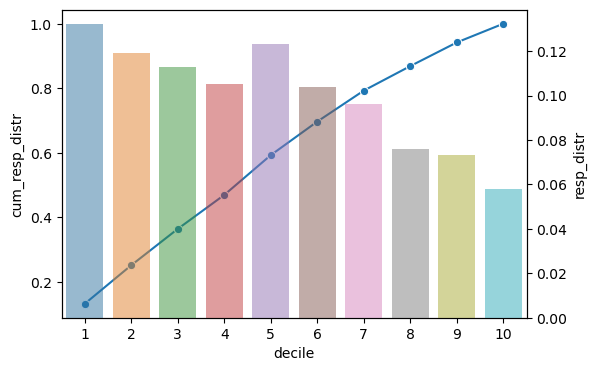

In [121]:
# Plot responder distribution along with its cumulative
import matplotlib

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None)
fig, ax1 = plt.subplots(figsize=(6,4))
ax1.set(xlabel='decile')

sns.lineplot(data=result['cum_resp_distr'], marker='o', sort=False, ax=ax1)
ax2=ax1.twinx()

sns.barplot(data=result, x='decile', y='resp_distr', alpha=0.5, ax=ax2)

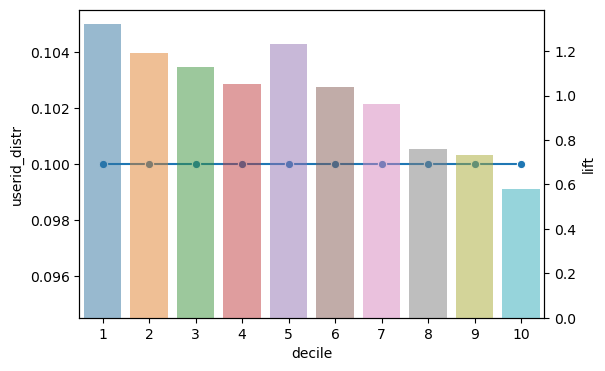

In [119]:
# Plot lift chart and response distribution
import matplotlib

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None)
fig, ax1 = plt.subplots(figsize=(6,4))
ax1.set(xlabel='decile')

sns.lineplot(data=result['userid_distr'], marker='o', sort=False, ax=ax1)
ax2=ax1.twinx()

sns.barplot(data=result, x='decile', y='lift', alpha=0.5, ax=ax2)

In [ ]:
#END